* We have data set from year 1970 to 2011 of percentage of women who graduated in various majors.
* Lets import necessary packages first.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [18]:
%matplotlib inline

In [3]:
women_degrees = pd.read_csv('data/percent-bachelors-degrees-women-usa.csv')

In [6]:
women_degrees.shape

(42, 18)

In [4]:
women_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
Year                             42 non-null int64
Agriculture                      42 non-null float64
Architecture                     42 non-null float64
Art and Performance              42 non-null float64
Biology                          42 non-null float64
Business                         42 non-null float64
Communications and Journalism    42 non-null float64
Computer Science                 42 non-null float64
Education                        42 non-null float64
Engineering                      42 non-null float64
English                          42 non-null float64
Foreign Languages                42 non-null float64
Health Professions               42 non-null float64
Math and Statistics              42 non-null float64
Physical Sciences                42 non-null float64
Psychology                       42 non-null float64
Public Administration            42 non-null float6

In [5]:
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


* Data is already in good shape. There is NO null values and type of each column looks perfect.

----------------

* There are total 17 majors in dataset. We want to compare men and women graduation rate across all the majors.

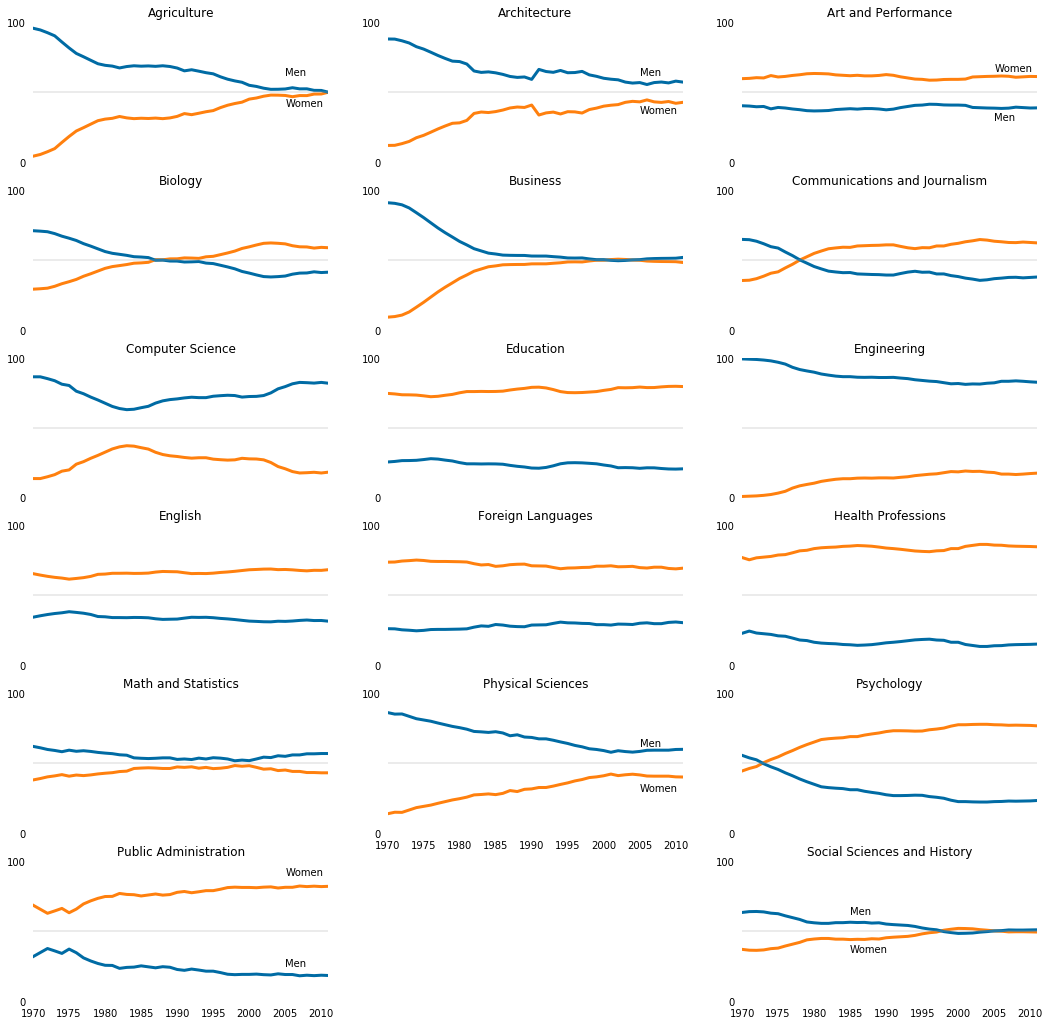

In [55]:
fig = plt.figure(figsize=(18, 18))

m_clr = (0/255,107/255,164/255) # colorbling friendly blue
w_clr = (255/255, 128/255, 14/255) # colorblind friendly orange
for idx, mjr in enumerate(women_degrees.columns[1:], 1):
    if idx == 17:
        idx += 1
    ax = fig.add_subplot(6,3, idx)
    ax.plot(women_degrees['Year'], women_degrees[mjr], c = w_clr,
            linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[mjr], c = m_clr,
            linewidth = 3)
    ax.set_title(mjr)
    
    # get rid of ticks
    ax.tick_params(bottom=False, top=False, left=False, right=False, 
                   labelbottom=False)
    
    # only enable label for bottom most plot, which is 14,16,18
    if idx in [14,16,18]:
        ax.tick_params(labelbottom=True)
    ax.set_xlim(1970,2011)
    ax.set_ylim(0,100)
    
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    # Get rid of spines
    for key, val in ax.spines.items():
        ax.spines[key].set_visible(False)
        
    # Anotate graph
    if idx == 1:
        ax.text(2005,40,"Women")
        ax.text(2005,62, "Men")
    elif idx ==2 :
        ax.text(2005,35,"Women")
        ax.text(2005,62, "Men")
    elif idx ==3 :
        ax.text(2005,65,"Women")
        ax.text(2005,30, "Men")
    elif idx == 14:
        ax.text(2005,30,"Women")
        ax.text(2005,62, "Men")
    elif idx == 16:
        ax.text(2005,90,"Women")
        ax.text(2005,25, "Men")
    elif idx == 18:
        ax.text(1985,35,"Women")
        ax.text(1985,62, "Men")

In [56]:
fig.savefig('gender_gap.png')